In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Reading train data

In [11]:
train = pd.read_csv('../data/train.csv')
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


### Variable description

* Target: Claim Status (Claim)
* Name of agency (Agency)
* Type of travel insurance agencies (Agency.Type)
* Distribution channel of travel insurance agencies (Distribution.Channel)
* Name of the travel insurance products (Product.Name)
* Duration of travel (Duration)
* Destination of travel (Destination)
* Amount of sales of travel insurance policies (Net.Sales)
* The commission received for travel insurance agency (Commission)
* Age of insured (Age)
* The identification record of every observation (ID)

## Exploratory data analysis on train data

### Basic insights

In [12]:
train.tail()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1
52306,5282,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.000000,9.2000,54,0
52307,7083,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37,0
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46,0
52309,4791,C2B,Airlines,Online,Annual Silver Plan,414,SINGAPORE,216.000000,54.0000,41,0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [14]:
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [15]:
# catagorical variables and numerical variables

train_cat_var = train.select_dtypes(exclude = 'number').columns.tolist()
print('Categorical variables: ',train_cat_var)

train_num_var = train.select_dtypes(include = 'number').columns.tolist()
print('Numerical variables: ',train_num_var)

Categorical variables:  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
Numerical variables:  ['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']


In [16]:
# for var in train_cat_var:
#     print(train[var].value_counts())
#     print('='*100)

### Visualisation

In [17]:
train_var = train.columns.tolist()
train_var

['ID',
 'Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Duration',
 'Destination',
 'Net Sales',
 'Commision (in value)',
 'Age',
 'Claim']

## Univariate analysis

### For Numerical data

In [18]:
# # Histograms for distribution for numerical variable

# for i in train_num_var:
#     sns.distplot(train[i], hist = True, kde = True)
#     plt.title('Distribution for {}'.format(i))
#     plt.xlabel(i)
#     print('='*100)
#     plt.show()

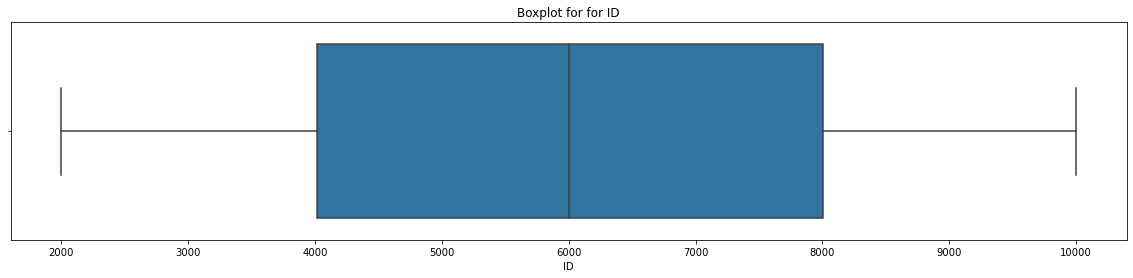

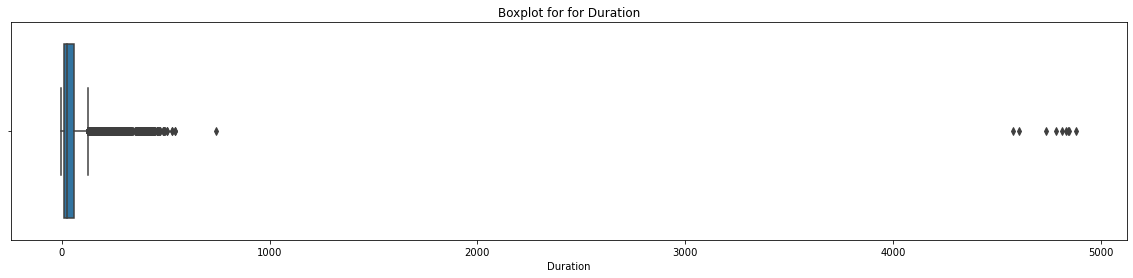

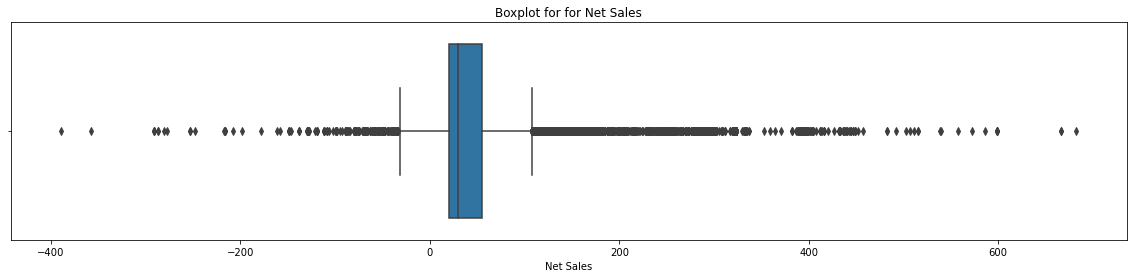

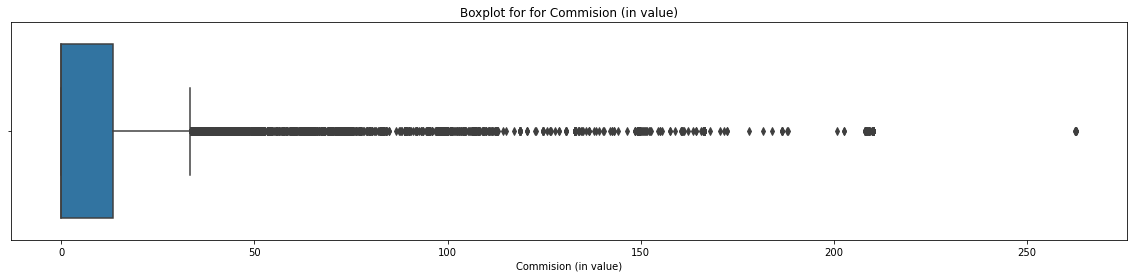

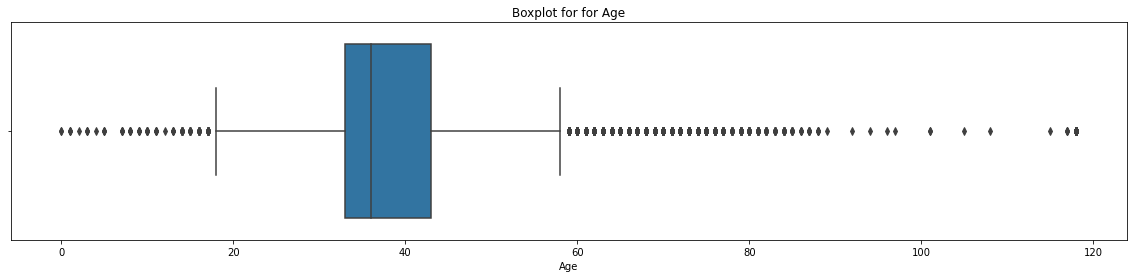

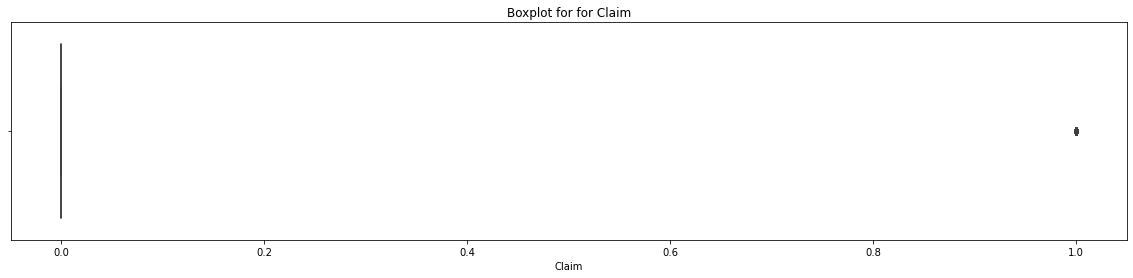

In [19]:
# Boxplot for numerical variables

for i in train_num_var:
    plt.figure(figsize=(20,4))
    sns.boxplot(x = train[i])
    plt.title('Boxplot for for {}'.format(i))
    plt.xlabel(i)
    print('='*100)
    plt.show()

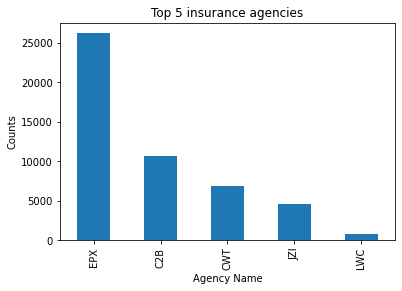

In [20]:
train['Agency'].value_counts().sort_values(ascending = False)[:5].plot(kind = 'bar')
plt.title("Top 5 insurance agencies")
plt.xlabel('Agency Name')
plt.ylabel('Counts')
plt.show()

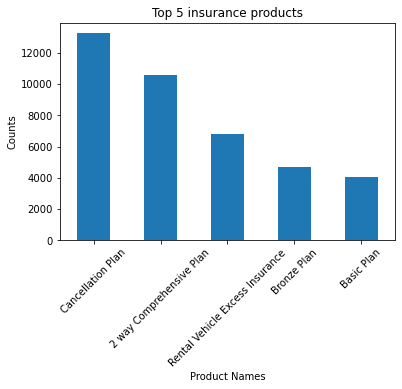

In [21]:
train['Product Name'].value_counts().sort_values(ascending = False)[:5].plot(kind = 'bar')
plt.title("Top 5 insurance products")
plt.xlabel('Product Names')
plt.xticks(rotation = 45)
plt.ylabel('Counts')
plt.show()

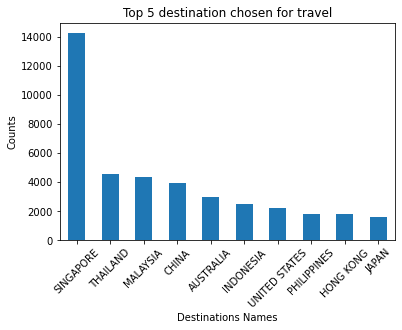

In [22]:
train['Destination'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.title("Top 5 destination chosen for travel")
plt.xlabel('Destinations Names')
plt.xticks(rotation = 45)
plt.ylabel('Counts')
plt.show()

In [23]:
train['Destination'].value_counts().sort_values(ascending = False)[:10]

SINGAPORE        14242
THAILAND          4562
MALAYSIA          4359
CHINA             3909
AUSTRALIA         3011
INDONESIA         2516
UNITED STATES     2196
PHILIPPINES       1797
HONG KONG         1775
JAPAN             1611
Name: Destination, dtype: int64

In [24]:
train['Product Name'].value_counts().sort_values(ascending = False)[:5]

Cancellation Plan                  13254
2 way Comprehensive Plan           10555
Rental Vehicle Excess Insurance     6813
Bronze Plan                         4723
Basic Plan                          4042
Name: Product Name, dtype: int64

In [25]:
train['Distribution Channel'].value_counts()

Online     51419
Offline      891
Name: Distribution Channel, dtype: int64

In [26]:
# plt.figure(figsize = (10,8))
# sns.countplot(train['Agency'].sort_values(ascending = False))
# plt.title('Countplot for Agency')
# plt.ylabel('Counts')
# plt.xlabel('Agency')
# plt.show()

### For Catagorical data

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


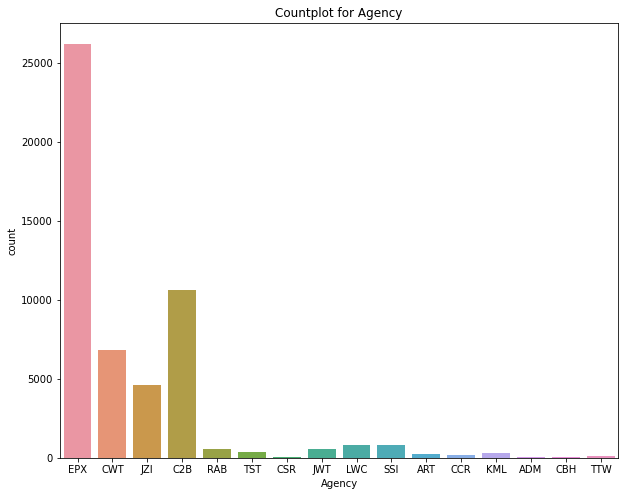

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


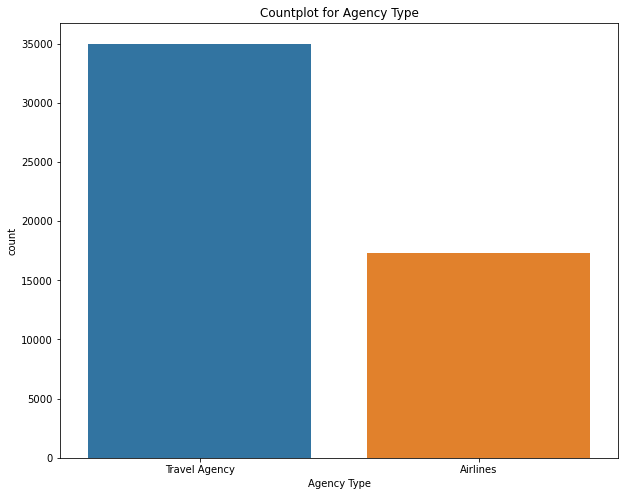

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


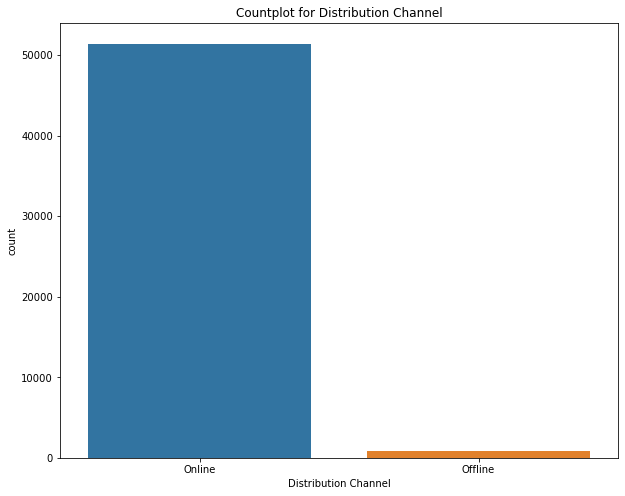

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


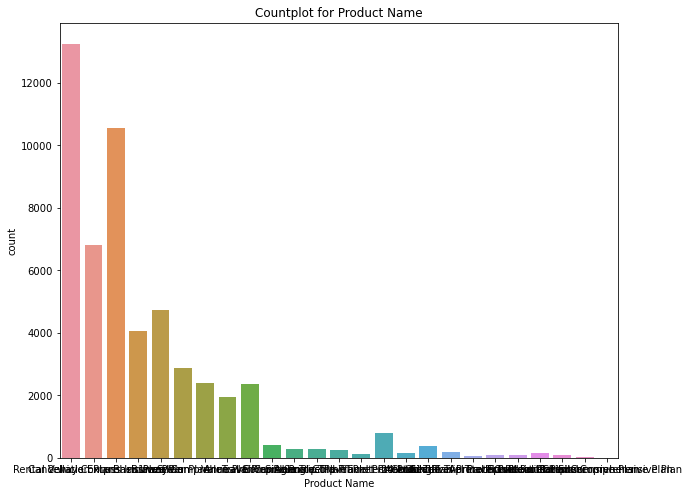

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


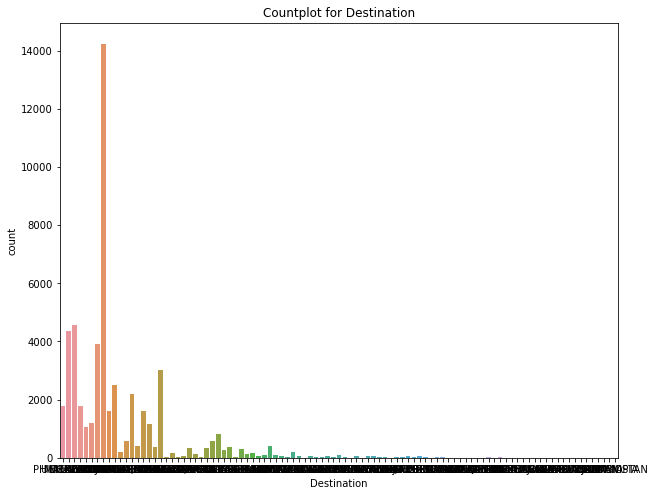

In [27]:
# Countplot for distribution of catagorical variable

for i in train_cat_var:
    plt.figure(figsize = (10,8))
    sns.countplot(train[i])
    plt.title('Countplot for {}'.format(i))
    plt.xlabel(i)
    print('='*100)
    plt.show()

## Multivariate analysis

### Numerical vs numerical

In [28]:
# sns.jointplot('Duration','Net Sales', data = train, kind = 'reg')
# plt.show()

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


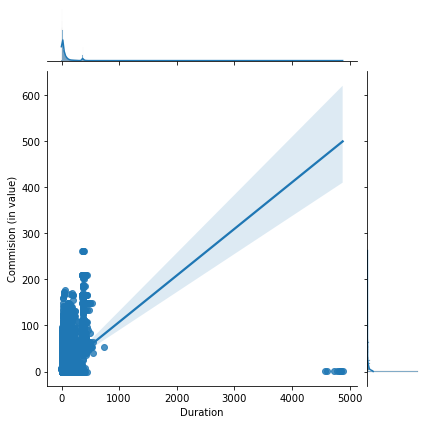

In [29]:
sns.jointplot('Duration','Commision (in value)', data = train, kind = 'reg')
plt.show()

In [30]:
# sns.jointplot('Duration','Age', data = train, kind = 'reg')
# plt.show()

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


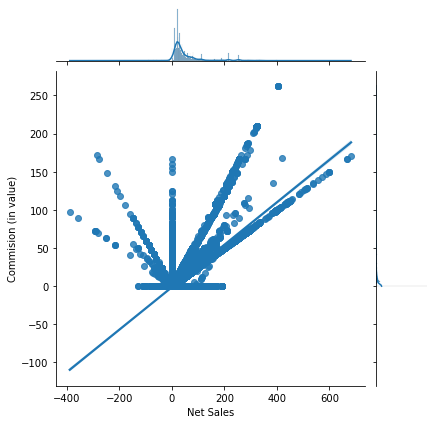

In [31]:
sns.jointplot('Net Sales','Commision (in value)', data = train, kind = 'reg')
plt.show()

In [32]:
# sns.jointplot('Net Sales','Age', data = train, kind = 'reg')
# plt.show()

In [33]:
# sns.jointplot('Commision (in value)','Age', data = train, kind = 'reg')
# plt.show()

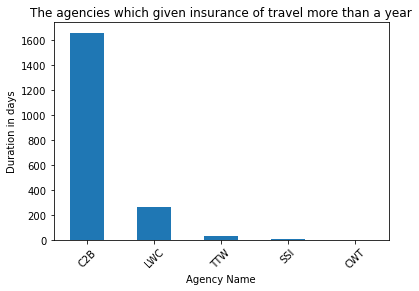

In [34]:
train[train['Duration']>365]['Agency'].value_counts().plot(kind = 'bar')
plt.title('The agencies which given insurance of travel more than a year')
plt.xlabel('Agency Name')
plt.ylabel('Duration in days')
plt.xticks(rotation = 45)
plt.show()

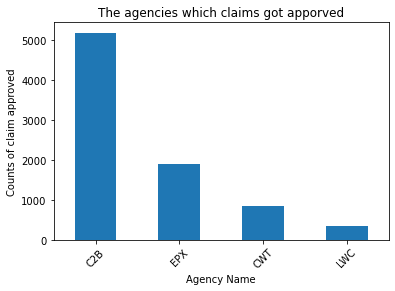

In [35]:
train[train['Claim'] == 1]['Agency'].value_counts()[:4].plot(kind = 'bar')
plt.title('The agencies which claims got apporved')
plt.xlabel('Agency Name')
plt.ylabel('Counts of claim approved')
plt.xticks(rotation = 45)
plt.show()

In [36]:
train[train['Duration']>365]['Agency'].value_counts()

C2B    1663
LWC     261
TTW      32
SSI       9
CWT       1
Name: Agency, dtype: int64

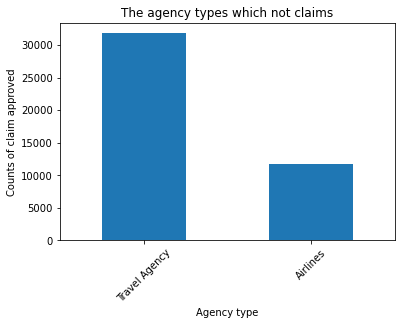

In [37]:
train[train['Claim'] == 0]['Agency Type'].value_counts().plot(kind = 'bar')
plt.title('The agency types which not claims')
plt.xlabel('Agency type')
plt.ylabel('Counts of claim approved')
plt.xticks(rotation = 45)
plt.show()

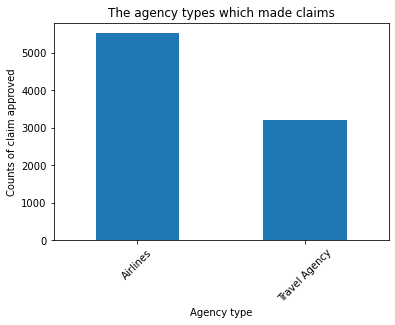

In [38]:
train[train['Claim'] == 1]['Agency Type'].value_counts().plot(kind = 'bar')
plt.title('The agency types which made claims')
plt.xlabel('Agency type')
plt.ylabel('Counts of claim approved')
plt.xticks(rotation = 45)
plt.show()

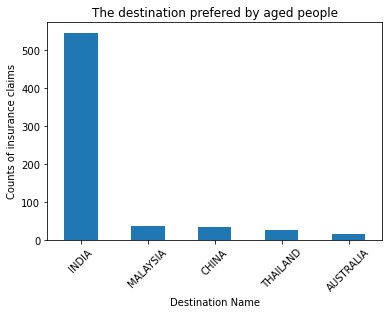

In [39]:
train[train['Age'] >= 100]['Destination'].value_counts()[:5].plot(kind = 'bar')
plt.title('The destination prefered by aged people')
plt.xlabel('Destination Name')
plt.ylabel('Counts of insurance claims')
plt.xticks(rotation = 45)
plt.show()

In [40]:
train['Claim'].value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

### Numerical vs Categorical

In [41]:
# for cat in train_cat_var:
#     for num in train_num_var:
#         plt.figure(figsize = (10,8))
#         sns.boxplot(x = train[cat], y = train[num])
#         plt.show()

### Categorical vs Categorical

In [42]:
# for i in train_cat_var:
#     pd.crosstab(index = train[i], columns = train['Claim']).unstack().plot(kind = 'bar', stacked = True, figsize = (10,7))
#     plt.legend()
#     print('='*100)
#     plt.show()


# for i in range(len(train_cat_var)):
#     pd.crosstab(index = train[train_cat_var[i]], columns = train[train_cat_var[i+1]]).unstack().plot(kind = 'bar', stacked = True, figsize = (10,7))
#     print('='*100)
#     plt.show()
#     if i == len(train_cat_var):
#         break

In [43]:
# sns.pairplot(train, x_vars=[
#  'Agency',
#  'Agency Type',
#  'Distribution Channel',
#  'Product Name',
#  'Duration',
#  'Destination',
#  'Net Sales',
#  'Commision (in value)',
#  'Age','Claim'],y_vars=['Agency',
#  'Agency Type',
#  'Distribution Channel',
#  'Product Name',
#  'Duration',
#  'Destination',
#  'Net Sales',
#  'Commision (in value)',
#  'Age','Claim'])
# plt.show()

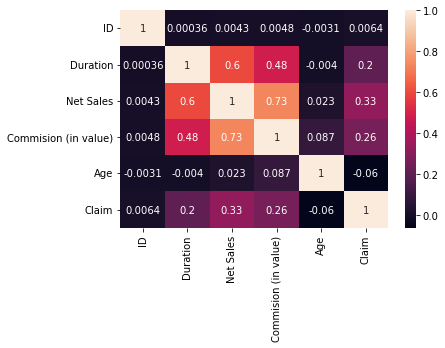

In [44]:
corr = train.corr()
sns.heatmap(corr, annot = True)
plt.show()

### Claims for 0 commision

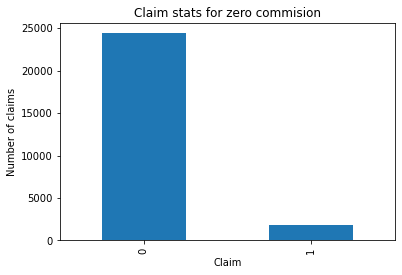

In [45]:
# plt.figure(figsize = (16,10))
train[train['Commision (in value)'] == 0].groupby('Claim')['Commision (in value)'].count().plot(kind = 'bar')
plt.ylabel('Number of claims')
plt.title('Claim stats for zero commision')
plt.show()


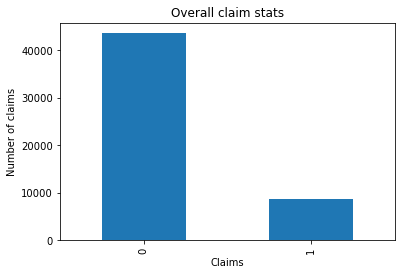

In [46]:
train['Claim'].value_counts().plot(kind = 'bar')
plt.xlabel('Claims')
plt.ylabel('Number of claims')
plt.title('Overall claim stats')
plt.show()

In [47]:
train['Claim'].value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

### Insights:

    1. There is no missing value in the data.
    2. Duration should not be negative
    3. majority num variable looks right skewed.
    4. dtypes seems fine.
    5. Out of catagorical variables Agency type and distribution channel can be converted to OHE. 
    6. So many outliers which needs treatment before model learning phase
    7. Net Sales and Commision (in value) are directly corelated

### Treatment for duration column

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


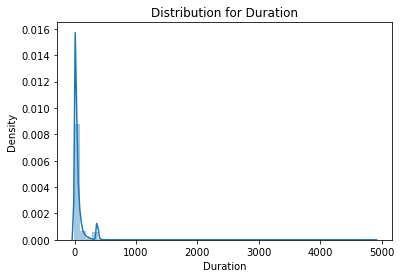

In [48]:
# Histogram for duration

# plt.figure(figsize = (15,6))
sns.distplot(train['Duration'], hist = True, kde = True)
plt.title('Distribution for Duration')
plt.show()

In [49]:
train['Duration'] = np.where(train['Duration']<=0,1,train['Duration'])
train['Duration'] = train['Duration'].map(lambda x : np.log(x))

C:\Users\gmahi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


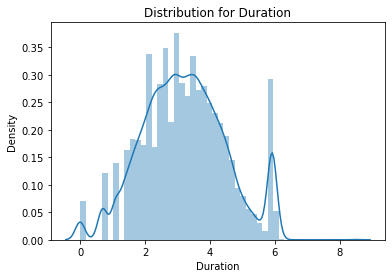

In [50]:
# plt.figure(figsize = (15,6))
sns.distplot(train['Duration'], hist = True, kde = True)
plt.title('Distribution for Duration')
plt.show()

### Treatment for commision (in Value) column

In [51]:
# plt.figure(figsize = (15,6))
# sns.distplot(train['Commision (in value)'], hist = True, kde = True)
# plt.title('Distribution for Commision')
# plt.show()

In [52]:
# train['Commision (in value)'] = train['Commision (in value)'].map(lambda x : (x)**(1/3))

In [53]:
# plt.figure(figsize = (15,6))
# sns.distplot(train['Commision (in value)'], hist = True, kde = True)
# plt.title('Distribution for Commision')
# plt.show()

### For Net Sales and Age columns

In [54]:
# plt.figure(figsize = (15,6))
# sns.distplot(train['Net Sales'], hist = True, kde = True)
# plt.title('Distribution for Net Sales')
# plt.show()

In [55]:
# plt.figure(figsize = (15,6))
# sns.distplot(train['Age'], hist = True, kde = True)
# plt.title('Distribution for Age')
# plt.show()

In [56]:
# # Standardization
# stdsc = StandardScaler()
# features_scale = ['Net Sales', 'Age']
# train[features_scale] = stdsc.fit_transform(train[features_scale])

In [57]:
# # MinMaxScaler
# min_max_scaler = MinMaxScaler()
# features_scale = ['Net Sales', 'Age']
# train[features_scale] = min_max_scaler.fit_transform(train[features_scale])

In [58]:
# plt.figure(figsize = (15,6))
# sns.distplot(train['Net Sales'], hist = True, kde = True)
# plt.title('Distribution for Net Sales')
# plt.show()

In [59]:
# plt.figure(figsize = (15,6))
# sns.distplot(train['Age'], hist = True, kde = True)
# plt.title('Distribution for Age')
# plt.show()

In [60]:
# train['Agency'].value_counts().sort_values(ascending = False)

In [61]:
# threshold = 4500
# agency_name_index = Agency_name_counts[Agency_name_counts <= threshold].index
# train['Agency'] = train['Agency'].replace(agency_name_index, 'Other')
# train['Agency'].value_counts()

In [62]:
Agency_name = train['Agency'].value_counts()[:4].index
train['Agency'] = train['Agency'].map(lambda x : x if x in Agency_name else 'Others')

In [63]:
# train['Destination'].value_counts().sort_values(ascending = False)[:10]

In [64]:
# threshold_1 = 3000
# Destination_index = Destination_counts[Destination_counts <= threshold_1].index
# train['Destination'] = train['Destination'].replace(Destination_index, 'Other')
# train['Destination'].value_counts()

In [65]:
Destination_name = train['Destination'].value_counts()[:6].index
train['Destination'] = train['Destination'].map(lambda x : x if x in Destination_name else 'Others')

In [66]:
# train['Product Name'].value_counts().sort_values(ascending = False)

In [67]:
# threshold_2 = 4000
# Product_name_index = Product_name_counts[Product_name_counts <= threshold_2].index
# train['Product Name'] = train['Product Name'].replace(Product_name_index, 'Other')
# train['Product Name'].value_counts()

In [68]:
Product_name = train['Product Name'].value_counts()[:5].index
train['Product Name'] = train['Product Name'].map(lambda x : x if x in Product_name else 'Others')

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_column = ['Agency', 'Product Name','Destination']
for x in label_column:
    train[x] = le.fit_transform(train[x])

## Machine Learning

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  int32  
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  int32  
 5   Duration              52310 non-null  float64
 6   Destination           52310 non-null  int32  
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(3), int32(3), int64(3), object(2)
memory usage: 3.8+ MB


In [71]:
train.drop(columns = ['ID','Commision (in value)'], axis = 1, inplace = True)

In [72]:
train = pd.get_dummies(train)

In [73]:
train.head()

,Agency,Product Name,Duration,Destination,Net Sales,Age,Claim,Agency Type_Airlines,Agency Type_Travel Agency,Distribution Channel_Offline,Distribution Channel_Online
0,2,3,4.110874,4,12.0,41,0,0,1,0,1
1,2,3,1.386294,3,17.0,35,0,0,1,0,1
2,1,5,3.258097,6,19.8,47,0,0,1,0,1
3,2,0,2.708050,4,27.0,48,0,0,1,0,1
4,2,0,2.708050,3,37.0,36,0,0,1,0,1


In [74]:
train.shape

(52310, 11)

In [75]:
# Seperating Target and other variables
X = train.drop(['Claim'], axis = 1)
y = train['Claim']

# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 0)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [58]:
# # Create params

# model_param = {
    
#     'DecisionTreeClassifier':{
#         'model':DecisionTreeClassifier(),
#         'param':{
#             'Criterion':['gini']
#         }
#     },
#     'KNeighborsClassifier':{
#         'model':KNeighborsClassifier(),
#         'param':{
#             'n_neighbors':[5,10,15,20,25]
#         }
#     },
#     'SVC':{
#         'model': SVC(),
#         'param':{
#             'Kernel':['rbf','linear','sigmoid'],
#             'C':[1.0,10,100]
#         }
#     } 
# }

In [59]:
# score = []
# for model_name, mp in model_param.items():
#     model_selection = GridSearchCV(estimator = mp['model'], param_grid = mp['param'],cv=5)
#     model_selection.fit(X_train,y_train)
#     score.append({
#         'model' : model_name,
#         'best_score' : model_selection.best_score_,
#         'best_param' : model_selection.best_params_
#     })

# model_score = pd.DataFrame(score, columns = ['Model', 'Best Score', 'Best Params'])
# model_score

In [77]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [78]:
scr_dtc = precision_score(y_test,y_pred_dtc)
print(scr_dtc)

0.7379972565157751


In [79]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred_knc = knc.predict(X_test)

In [80]:
scr_knc = precision_score(y_test,y_pred_knc)
print(scr_knc)

0.6581325301204819


In [81]:
# svc = SVC()
# svc.fit(X_train,y_train)
# y_pred_svc = svc.predict(X_test)

In [82]:
# scr_svc = precision_score(y_test,y_pred_svc)
# print(scr_svc)

In [83]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [84]:
scr_rfc = precision_score(y_test,y_pred_rfc)
print(scr_rfc)

0.7943648047454276


In [85]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)

In [86]:
scr_gbc = precision_score(y_test,y_pred_gbc)
print(scr_gbc)

0.6395939086294417


In [87]:
ada_clf = AdaBoostClassifier(base_estimator=dtc,random_state = 0)
ada_clf.fit(X_train,y_train)
y_pred_ada = ada_clf.predict(X_test)

In [88]:
scr_ada = precision_score(y_test,y_pred_ada)
print(scr_ada)

0.7766942954656265


### Test data preparation for machine learning

In [89]:
test = pd.read_csv('../data/test.csv')
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22421 entries, 0 to 22420
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    22421 non-null  int64  
 1   Agency                22421 non-null  object 
 2   Agency Type           22421 non-null  object 
 3   Distribution Channel  22421 non-null  object 
 4   Product Name          22421 non-null  object 
 5   Duration              22421 non-null  int64  
 6   Destination           22421 non-null  object 
 7   Net Sales             22421 non-null  float64
 8   Commision (in value)  22421 non-null  float64
 9   Age                   22421 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.7+ MB


In [91]:
test.describe()

,ID,Duration,Net Sales,Commision (in value),Age
count,22421.000000,22421.000000,22421.000000,22421.000000,22421.000000
mean,15499.196646,59.100665,49.446070,12.316924,39.784889
std,2606.751171,114.819397,61.794609,22.957306,13.910773
min,11000.000000,-1.000000,-297.000000,0.000000,1.000000
25%,13236.000000,10.000000,19.800000,0.000000,34.000000
50%,15515.000000,24.000000,29.518868,0.000000,36.000000
75%,17762.000000,58.000000,56.000000,13.630000,43.000000
max,20000.000000,4857.000000,810.000000,283.500000,118.000000


In [92]:
# catagorical variables and numerical variables

test_cat_var = test.select_dtypes(exclude = 'number').columns.tolist()
print('Categorical variables: ',test_cat_var)

test_num_var = test.select_dtypes(include = 'number').columns.tolist()
print('Numerical variables: ',test_num_var)

Categorical variables:  ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
Numerical variables:  ['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age']


In [93]:
# For Duration Column
test['Duration'] = np.where(test['Duration']<=0,1,test['Duration'])
test['Duration'] = test['Duration'].map(lambda x : np.log(x))

# # For Commision (in value) Column
# test['Commision (in value)'] = test['Commision (in value)'].map(lambda x : (x)**(1/3))

# # MinMaxScaler
# min_max_scaler = MinMaxScaler()
# features_scale = ['Net Sales', 'Age']
# test[features_scale] = min_max_scaler.fit_transform(test[features_scale])



In [94]:
# # Agency OHE preparation
# Agency_name_counts_test = test['Agency'].value_counts().sort_values(ascending = False)
# threshold = 4500
# agency_name_index = Agency_name_counts[Agency_name_counts <= threshold].index
# test['Agency'] = test['Agency'].replace(agency_name_index, 'Other')
# test['Agency'].value_counts()

# # Destination OHE preparation
# Destination_counts = test['Destination'].value_counts().sort_values(ascending = False)
# threshold_1 = 3000
# Destination_index = Destination_counts[Destination_counts <= threshold_1].index
# test['Destination'] = test['Destination'].replace(Destination_index, 'Other')
# test['Destination'].value_counts()

# # Product Name OHE preparation
# Product_name_counts = test['Product Name'].value_counts().sort_values(ascending = False)
# threshold_2 = 4000
# Product_name_index = Product_name_counts[Product_name_counts <= threshold_2].index
# test['Product Name'] = test['Product Name'].replace(Product_name_index, 'Other')
# test['Product Name'].value_counts()

In [95]:
test['Agency'] = test['Agency'].map(lambda x : x if x in Agency_name else 'Others')
test['Destination'] = test['Destination'].map(lambda x : x if x in Destination_name else 'Others')
test['Product Name'] = test['Product Name'].map(lambda x : x if x in Product_name else 'Others')

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_column = ['Agency', 'Product Name','Destination']
for x in label_column:
    test[x] = le.fit_transform(test[x])

In [97]:
test.drop(columns = ['ID','Commision (in value)'], axis = 1, inplace = True)
test = pd.get_dummies(test)

## Applying machine learning model on test data

In [102]:
y_pred_t = rfc.predict(test)

# data_sub = pd.read_csv('sample_submission.csv')
# data_sub['Claim'] = y_pred_t


# csv_data = data_sub.to_csv('submission.csv', index = False)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [103]:
# train = pd.read_csv('train.csv')
# train.head()

# train['Duration'] = np.where(train['Duration']<=0,1,train['Duration'])
# train['Duration'] = train['Duration'].map(lambda x : np.log(x))

# # train['Commision (in value)'] = train['Commision (in value)'].map(lambda x : (x)**(1/3))

# Agency_name = train['Agency'].value_counts()[:4].index
# Destination_name = train['Destination'].value_counts()[:6].index
# Product_name = train['Product Name'].value_counts()[:5].index
# train['Agency'] = train['Agency'].map(lambda x : x if x in Agency_name else 'Others')
# train['Destination'] = train['Destination'].map(lambda x : x if x in Destination_name else 'Others')
# train['Product Name'] = train['Product Name'].map(lambda x : x if x in Product_name else 'Others')

# # from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# label_column = ['Agency', 'Product Name','Destination']
# for x in label_column:
#     train[x] = le.fit_transform(train[x])
    
# # # MinMaxScaler
# # min_max_scaler = MinMaxScaler()
# # features_scale = ['Net Sales', 'Age']
# # train[features_scale] = min_max_scaler.fit_transform(train[features_scale])

    
# train = pd.get_dummies(train)
# train.head()

In [104]:
# train.drop(columns = ['ID'], axis = 1, inplace = True)

In [105]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC


# # Seperating Target and other variables
# X = train.drop(['Claim'], axis = 1)
# y = train['Claim']

# # Splitting the data into test and train
# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 0)

# print("Precision Score :")
# dtc = DecisionTreeClassifier(criterion = 'entropy')
# dtc.fit(X_train,y_train)
# y_pred_dtc = dtc.predict(X_test)

# scr_dtc = precision_score(y_test,y_pred_dtc)
# print("Decision Tree :",scr_dtc)


# knc = KNeighborsClassifier()
# knc.fit(X_train,y_train)
# y_pred_knc = knc.predict(X_test)

# scr_knc = precision_score(y_test,y_pred_knc)
# print("KNeighbours :",scr_knc)


# rfc = RandomForestClassifier()
# rfc.fit(X_train,y_train)
# y_pred_rfc = rfc.predict(X_test)

# scr_rfc = precision_score(y_test,y_pred_rfc)
# print("Random Forest :",scr_rfc)


# gbc = GradientBoostingClassifier()
# gbc.fit(X_train,y_train)
# y_pred_gbc = gbc.predict(X_test)

# scr_gbc = precision_score(y_test,y_pred_gbc)
# print("Gradient Boosting :",scr_gbc)


# from sklearn.ensemble import AdaBoostClassifier
# ada_clf = AdaBoostClassifier(base_estimator=dtc,random_state = 0)
# ada_clf.fit(X_train,y_train)
# y_pred_ada = ada_clf.predict(X_test)

# scr_ada = precision_score(y_test,y_pred_ada)
# print("Ada Boosting :",scr_ada)

# print("="*100)
# print("Accuracy Score :")

# ascr_dtc = accuracy_score(y_test,y_pred_dtc)
# print("Decision Tree :",ascr_dtc)


# ascr_knc = accuracy_score(y_test,y_pred_knc)
# print("KNeighbours :",ascr_knc)


# ascr_rfc = accuracy_score(y_test,y_pred_rfc)
# print("Random Forest :",ascr_rfc)


# ascr_gbc = accuracy_score(y_test,y_pred_gbc)
# print("Gradient Boosting :",ascr_gbc)


# ascr_ada = accuracy_score(y_test,y_pred_ada)
# print("Ada Boosting :",ascr_ada)